## Import Modules

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os

# Extract mae6292.zip
with zipfile.ZipFile('/Mae6292newnew.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/MAE6292newnew')

# Verify extraction

print("Extracted files:", os.listdir('/content/MAE6292newnew'))

Extracted files: ['tools.py', 'imshow.py', '__init__.py']


In [ ]:
import sys
sys.path.append('/content/MAE6292newnew')

In [ ]:
# the following two lines solved the issue of video crashing for MacOS
# you may not need those, depending on you OS
import matplotlib

import numpy as np
import cv2
import matplotlib.pyplot as plt
import math
import scipy.signal
import scipy.linalg
import MAE6292newnew.tools as mae6292
import importlib

from MAE6292newnew.imshow import cv2_imshow

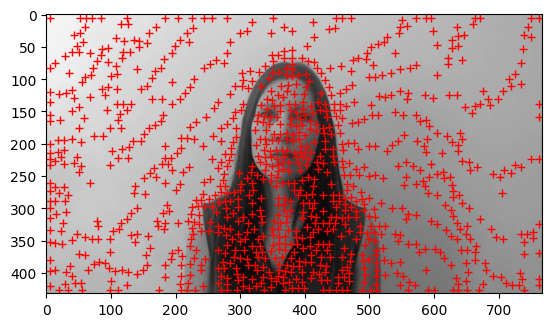

In [ ]:
%matplotlib inline

frame0 = cv2.imread('/face000000.png',cv2.IMREAD_GRAYSCALE)

W_harris_patch = 4
harris_kappa = 0.08
W_nms = 8
N_keypoints = 1000

## YOUR CODE HERE
# Step 1: Compute Harris corner response
R = mae6292.harris_corner(frame0, W_harris_patch, harris_kappa)

# Step 2: Select keypoints using non-maximum suppression
keypoints = mae6292.select_keypoints(R, N_keypoints, W_nms)

# Step 3: Convert keypoints to 2 x n array (swap row/col)
p0 = np.array(keypoints, dtype='float32').T
p0 = p0[[1, 0], :]  # swap to (row, col)





plt.figure(dpi=100)
plt.imshow(frame0, cmap='gray')
plt.plot(p0[0,:], p0[1,:], 'r+')

plt.savefig('prob1a.png')

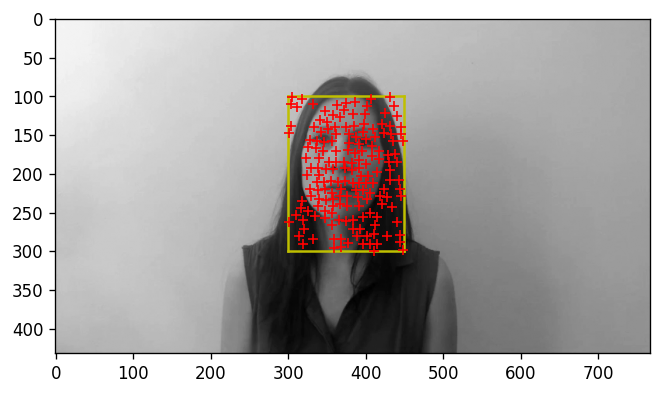

In [ ]:
def rectangle(u0, v0, u1, v1):
    plt.plot([u0, u1],[v0, v0],'y')
    plt.plot([u0, u1],[v1, v1],'y')
    plt.plot([u0, u0],[v0, v1],'y')
    plt.plot([u1, u1],[v0, v1],'y')

# 1. arbitrary values
u0, v0 = 300, 100
u1, v1 = 450, 300

# 2. Identify keypoints in the box
# empty container
p0_face = np.empty((2,0), dtype='float32')
# repeat for each keypoint
for i in range(p0.shape[1]):
    ## YOUR CODE HERE:
    ## write if statement for the case that the i-th keypoint (p[0,i], p[1,i]) belongs to the box
    if (u0 <= p0[0, i] <= u1) and (v0 <= p0[1, i] <= v1):
        p0_face = np.append(p0_face, p0[:, i].reshape(2, 1), axis=1)

# 3. Plot box and feaatures, adjust (u0,v0), (u1,v1) manually
plt.figure(dpi=120)
plt.imshow(frame0, cmap='gray')
rectangle(u0,v0, u1,v1)
plt.plot(p0_face[0,:], p0_face[1,:], 'r+')

plt.savefig('prob1b.png')


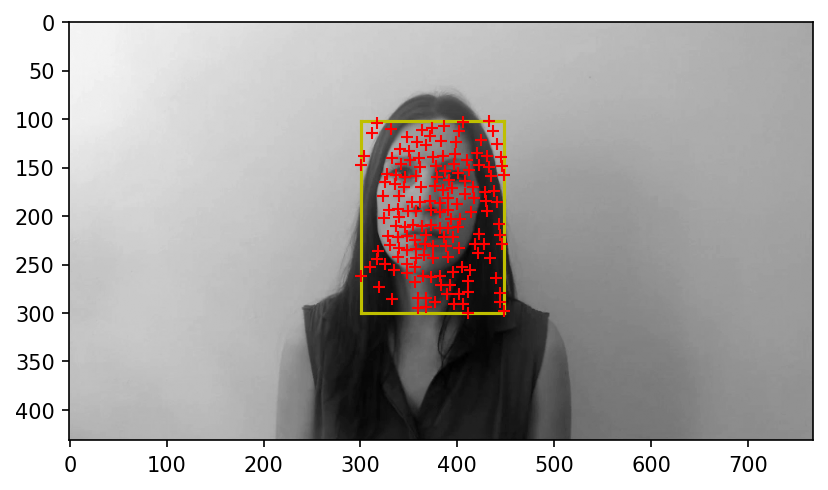

In [ ]:
frame1 = cv2.imread('/face000001.png',cv2.IMREAD_GRAYSCALE)

p1, index_track = mae6292.KLT(frame0, frame1, p0_face, W = 7, tol_bidir = 1, display = False)
p1_face = p1[:,index_track]

u0 = np.amin(p1_face[0,:])

## YOUR CODE HERE
## to define v0, (u1,v1)
v0 = np.amin(p1_face[1, :])
u1 = np.amax(p1_face[0, :])
v1 = np.amax(p1_face[1, :])

plt.figure(dpi=150)
plt.imshow(frame0, cmap='gray')
rectangle(u0,v0, u1,v1)
plt.plot(p1_face[0,:], p1_face[1,:], 'r+')

plt.savefig('prob2a.png')

Cloning into 'hw9-Prat1209'...
remote: Enumerating objects: 117, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 117 (delta 1), reused 0 (delta 0), pack-reused 114 (from 1)
Receiving objects: 100% (117/117), 30.89 MiB | 32.54 MiB/s, done.
Resolving deltas: 100% (1/1), done.


Text(0.5, 1.0, 'First Frame')

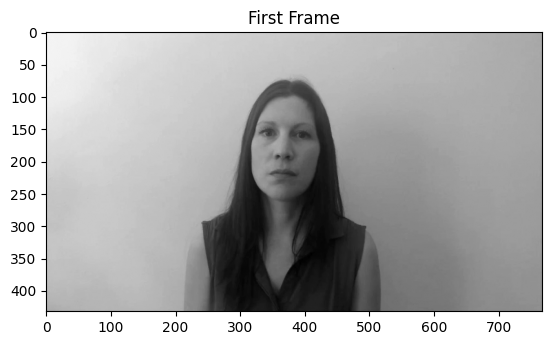

In [ ]:

# Set path
data_dir = 'hw9-Prat1209/data/'

# Test image load
import cv2
import matplotlib.pyplot as plt

frame0 = cv2.imread(data_dir + 'face000000.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(frame0, cmap='gray')
plt.title('First Frame')


<ipython-input-62-968afda49e0e>:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(dpi=50)


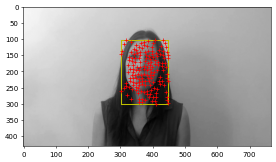

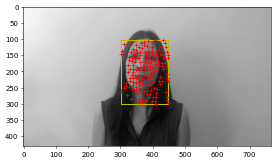

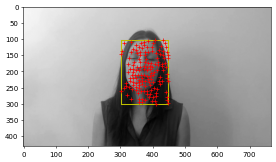

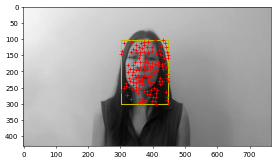

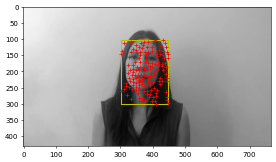

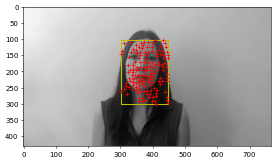

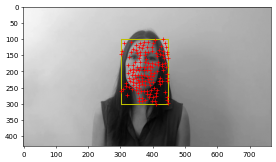

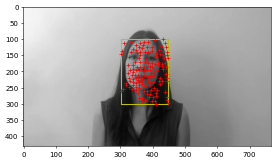

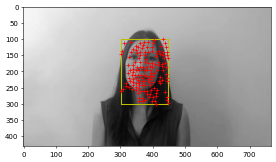

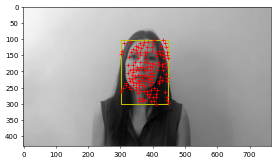

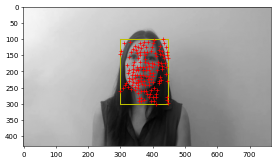

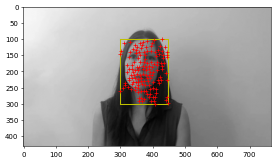

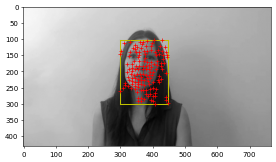

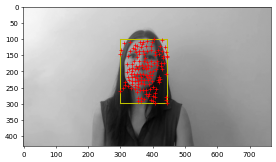

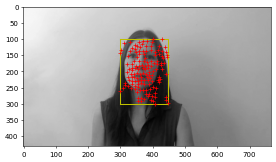

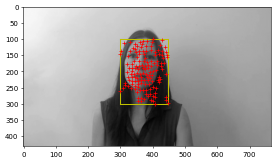

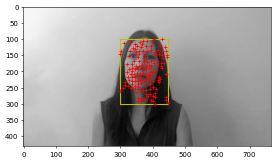

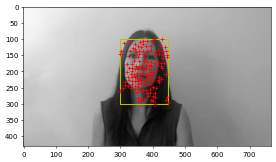

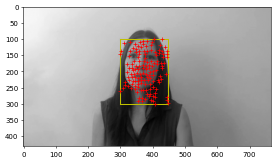

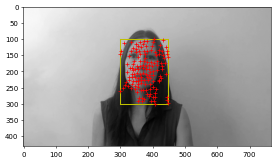

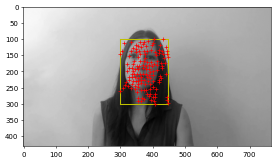

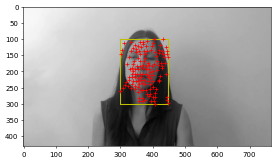

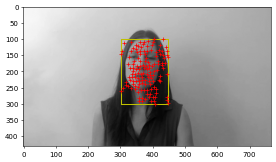

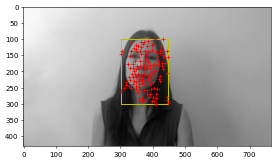

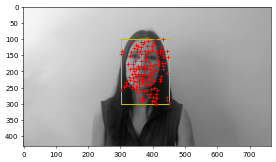

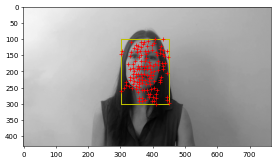

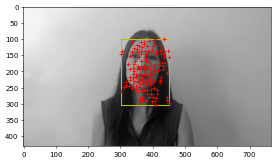

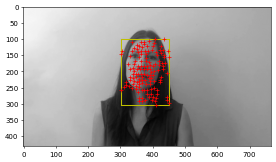

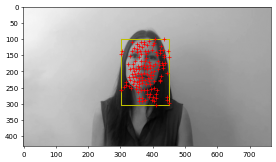

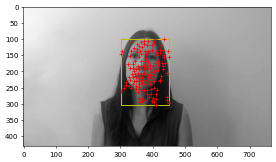

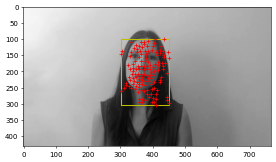

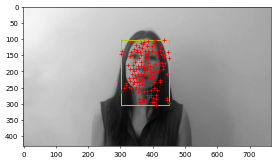

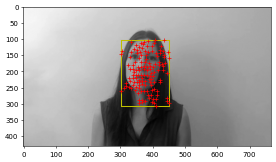

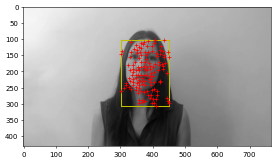

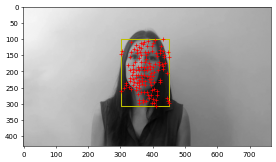

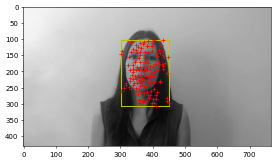

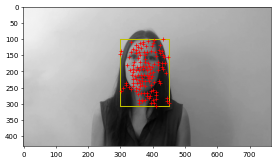

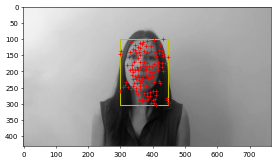

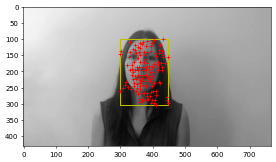

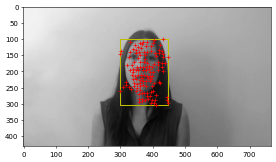

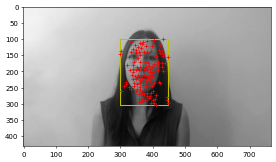

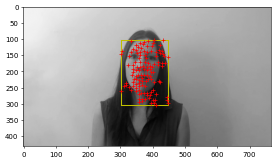

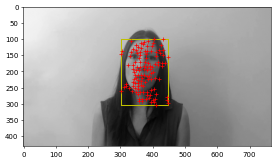

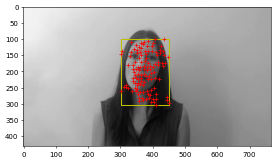

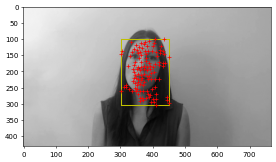

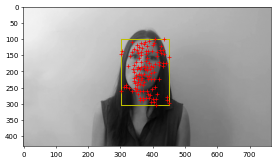

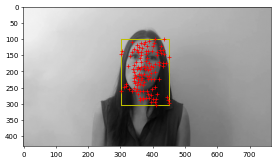

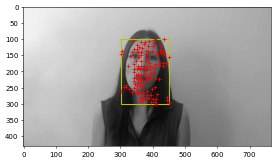

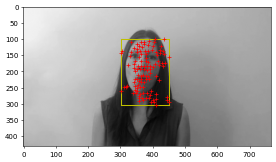

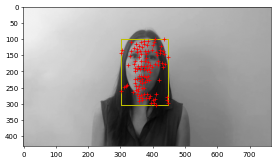

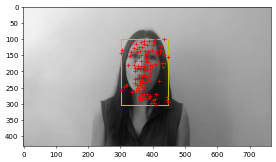

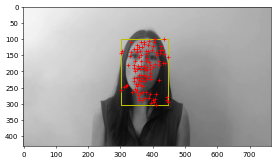

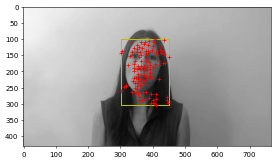

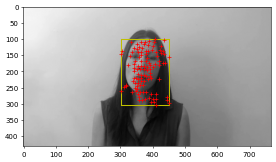

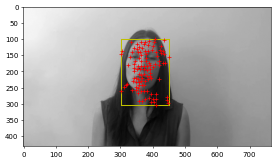

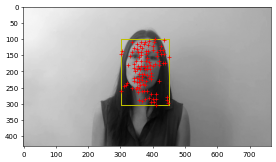

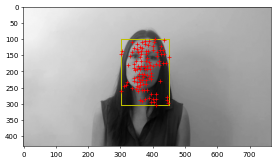

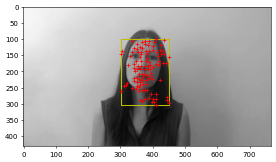

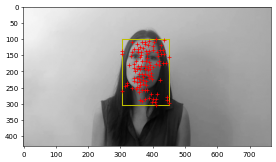

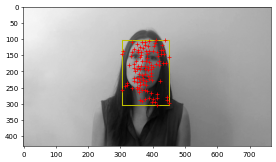

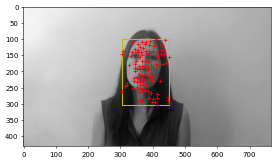

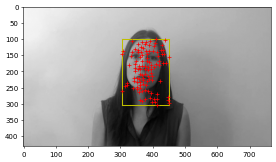

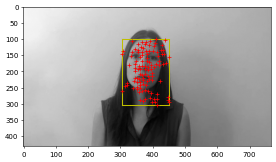

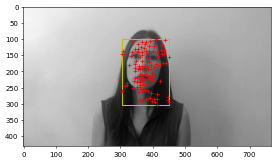

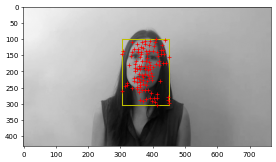

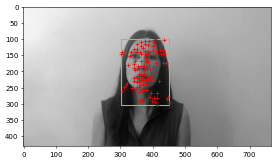

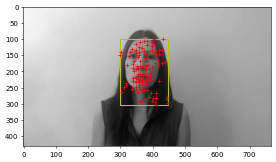

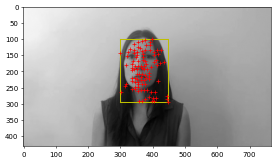

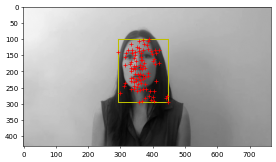

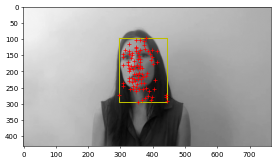

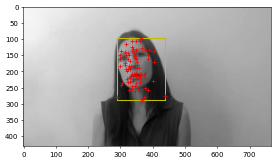

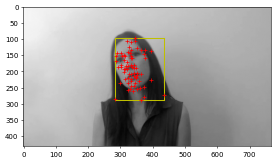

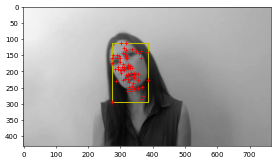

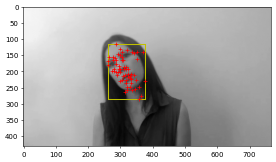

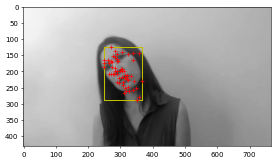

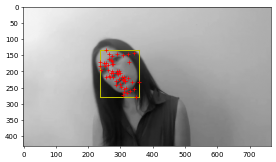

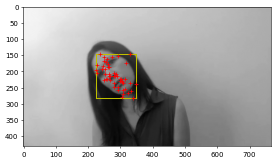

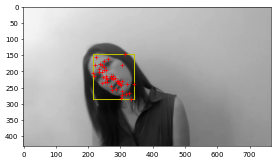

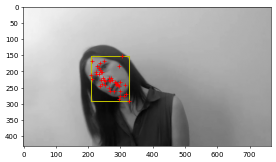

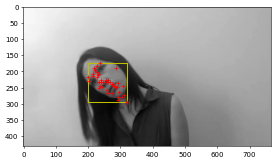

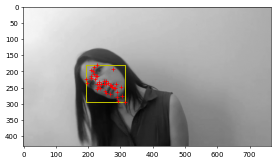

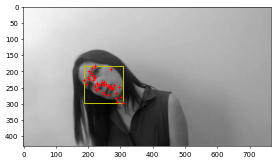

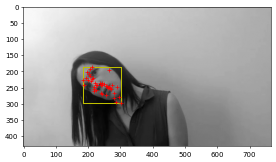

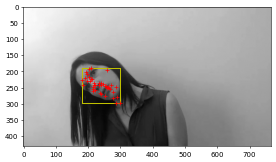

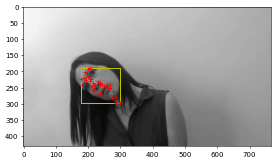

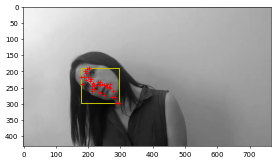

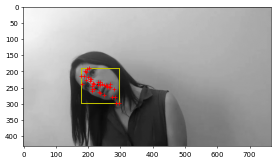

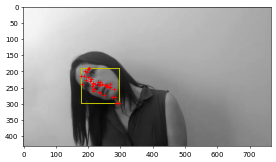

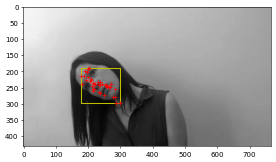

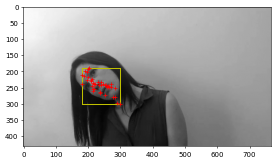

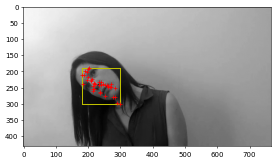

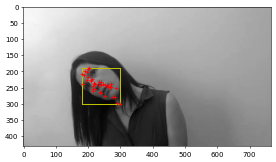

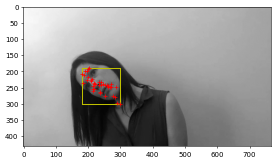

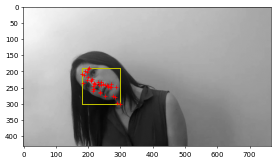

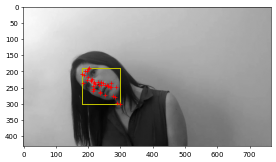

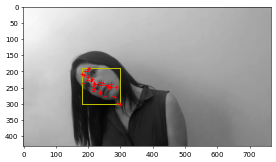

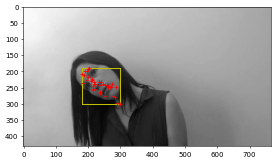

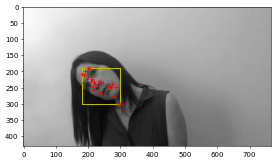

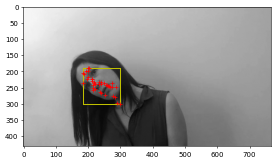

In [ ]:
# draw figures within jupyter
%matplotlib inline

frame_pre = frame0
p_face_pre = p0_face

for i in range(1, 100):
    frame = cv2.imread("hw9-Prat1209/data/face{:06d}.png".format(i), cv2.IMREAD_GRAYSCALE)

    ## YOUR CODE HERE
    # Track `p_face_pre` from frame_pre to frame
    p_new, index_track = mae6292.KLT(frame_pre, frame, p_face_pre, W=7, tol_bidir=1, display=False)
    p_face = p_new[:, index_track]
    # choose (u0, v0), (u1, v1)
    u0 = np.amin(p_face[0, :])
    v0 = np.amin(p_face[1, :])
    u1 = np.amax(p_face[0, :])
    v1 = np.amax(p_face[1, :])

    # show results
    plt.figure(dpi=50)
    plt.imshow(frame, cmap='gray')
    rectangle(u0,v0, u1,v1)
    plt.plot(p_face[0,:], p_face[1,:], 'r+')

    p_face_pre = p_face
    frame_pre = frame

plt.savefig('prob2b.png')

In [ ]:
import matplotlib.pyplot as plt
matplotlib.use('Agg')
from google.colab.patches import cv2_imshow
import cv2
import numpy as np


video_read = cv2.VideoCapture('/head-pose-face-detection-female.mp4')


width = int(video_read.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(video_read.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = video_read.get(cv2.CAP_PROP_FPS)
size = (width, height)


codec = cv2.VideoWriter_fourcc(*'mp4v')
video_save = cv2.VideoWriter('prob2c.mp4', codec, fps, size)


ret, frame_color = video_read.read() # color frame
if not ret:
    print("Error reading video file")
    exit()
frame_pre = cv2.cvtColor(frame_color, cv2.COLOR_BGR2GRAY) # grayscale frame

p_face_pre = p0_face # face features for the first frame


for i in range(1,300):
    ret, frame_color = video_read.read()
    if not ret:
        break
    frame = cv2.cvtColor(frame_color, cv2.COLOR_BGR2GRAY)

    ############################################
    ## YOUR CODE HERE

    # 1 Track p_face_pre from frame_pre to frame
    p_new, index_track = mae6292.KLT(frame_pre, frame, p_face_pre, W=7, tol_bidir=1, display=False)
    p_face = p_new[:, index_track]


    # 2 Compute
    u0 = np.amin(p_face[0, :])
    v0 = np.amin(p_face[1, :])
    u1 = np.amax(p_face[0, :])
    v1 = np.amax(p_face[1, :])

    cv2.rectangle(frame_color, (int(u0),int(v0)), (int(u1),int(v1)), (0, 255,255))
    frame_pre = frame
    p_face_pre = p_face
    #############################################

#    show the frame
    cv2_imshow(frame_color)
    #if cv2.waitKey(1) == ord('q'): # stop if "q" is pressed
        #break

 #   save the frame
    video_save.write(frame_color)

# release video files
video_read.release()
video_save.release()
#cv2.destroyAllWindows()



In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


video_path = '/WIN_20250416_13_44_02_Pro.mp4'
video_read = cv2.VideoCapture(video_path)

width = int(video_read.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(video_read.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = video_read.get(cv2.CAP_PROP_FPS)
size = (width, height)


codec = cv2.VideoWriter_fourcc(*'mp4v')
video_save = cv2.VideoWriter('prob3.mp4', codec, fps, size)

ret, frame_color = video_read.read()
frame_pre = cv2.cvtColor(frame_color, cv2.COLOR_BGR2GRAY)

# HARRIS PARAMETERS
W_harris_patch = 4
harris_kappa = 0.08
W_nms = 8
N_keypoints = 1000

# Harris corner detection
R = mae6292.harris_corner(frame_pre, W_harris_patch, harris_kappa)
keypoints = mae6292.select_keypoints(R, N_keypoints, W_nms)
p0 = np.array(keypoints, dtype='float32').T
p0 = p0[[1, 0], :]

p_face_pre = p0

# KLT PARAMETERS
W = 7
tol_bidir = 10

# tracking
while True:
    ret, frame_color = video_read.read()
    if not ret:
        break

    frame = cv2.cvtColor(frame_color, cv2.COLOR_BGR2GRAY)

    p_new, index_track = mae6292.KLT(frame_pre, frame, p_face_pre, W=W, tol_bidir=tol_bidir, display=False)
    p_face = p_new[:, index_track]

    if p_face.shape[1] < 5:
        continue

    # Bounding box
    u0 = np.percentile(p_face[0, :], 10)
    u1 = np.percentile(p_face[0, :], 90)
    v0 = np.percentile(p_face[1, :], 10)
    v1 = np.percentile(p_face[1, :], 90)

    # box and points
    cv2.rectangle(frame_color, (int(u0), int(v0)), (int(u1), int(v1)), (0, 255, 255), 2)
    for pt in p_face.T:
        x, y = int(pt[0]), int(pt[1])
        cv2.circle(frame_color, (x, y), 1, (0, 0, 255), -1)

    # Write frame
    video_save.write(frame_color)

    # Update for next frame
    frame_pre = frame
    p_face_pre = p_face


video_read.release()
video_save.release()